# Wstęp do uczenia maszynowego - projekt
### Piotr Bujalski 228703
### Temat: Predykcja dochodu na podstawie danych demograficznych.

# Źródło danych
Adult Income Dataset - https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

# Przygotowanie danych i środowiska
Zaimportowanie potrzebnych bibliotek do projektu

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

Zaimportowanie danych Adult i przypisanie nazw do kolumn

In [2]:
dane = pd.read_csv("adult.data", names = ["age", "workclass", "fnlwgt", "education", 
                                          "education-num", "marital-status", "occupation", 
                                          "relationship", "race", "sex", "capital-gain", "capital-loss", 
                                          "hours-per-week", "native-country", "income"])
dane.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Wygenerowanie statystyk opisowych

In [3]:
dane.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Pozbycie się wierszy z niepełnymi danymi

In [4]:
dane = dane.replace(to_replace = " ?", value = np.NaN).dropna().reset_index(drop=True)
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


Wykres przedstawiający ilość osób z dochodem w danym przedziale

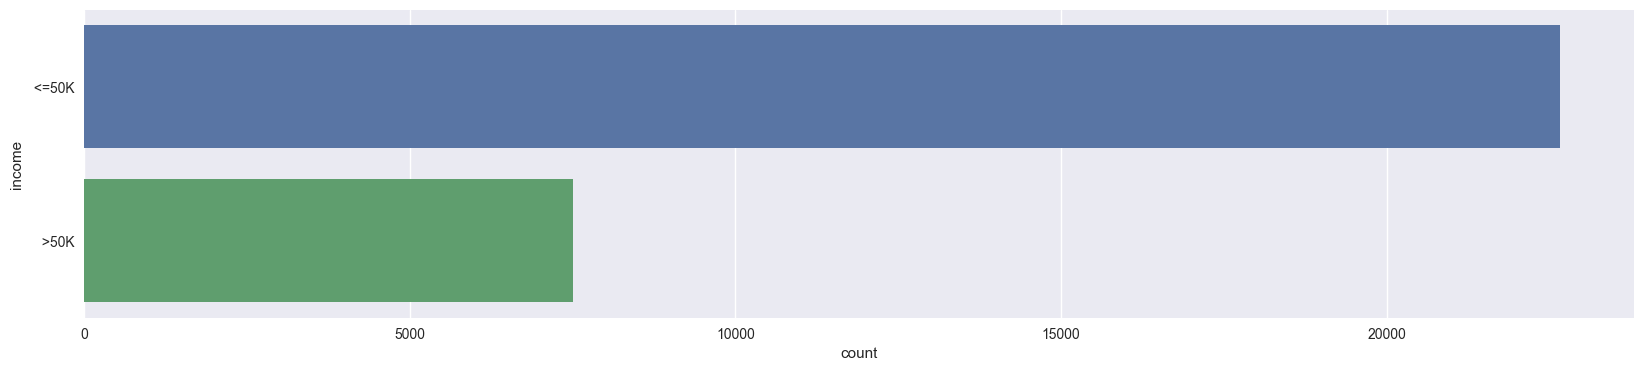

In [5]:
fig = plt.figure(figsize=(20,4))
plt.style.use('seaborn-v0_8')
sns.countplot(y="income", data=dane);

Wykres przedstawiający korelacje między wszystkimi zmiennymi

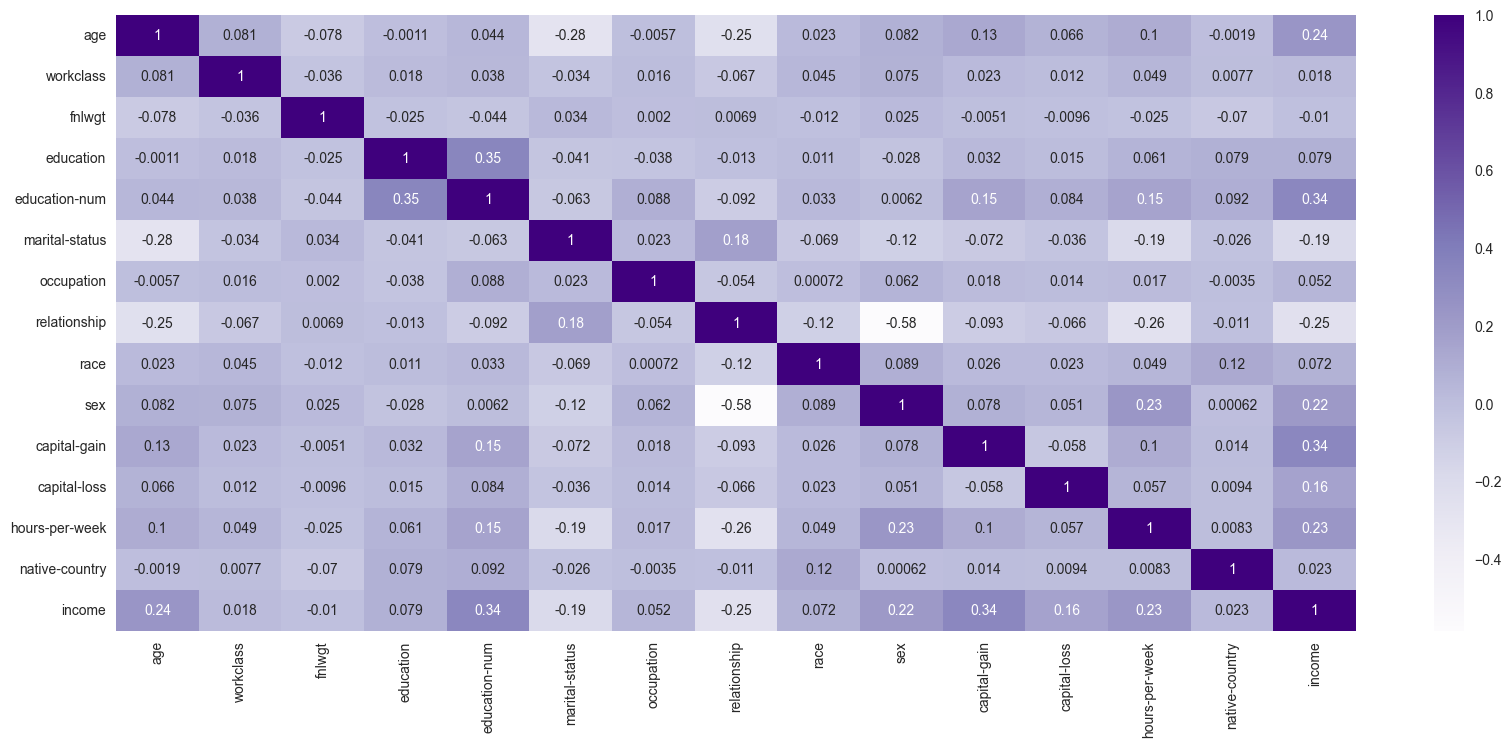

In [6]:
dane = dane.apply(LabelEncoder().fit_transform)
plt.figure(figsize = (20,8))
sns.heatmap(dane.corr(numeric_only = True), annot = True, cmap = "Purples");

Podział danych i ustawienie parametrów

In [7]:
X = dane.drop('income', axis = 1)
y = dane['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
X_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
26464,9,2,5527,7,11,4,9,1,4,0,0,0,35,38
1314,42,2,16959,11,8,0,3,1,4,0,0,0,39,38
8304,7,2,7572,15,9,4,0,3,1,1,0,0,19,38
11137,8,2,11807,9,12,4,0,3,2,1,0,0,34,38
21418,39,1,11750,2,7,4,5,1,4,1,0,0,39,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22357,11,2,17434,11,8,2,3,0,2,1,107,0,39,38
5934,4,2,11327,15,9,4,7,3,4,0,0,0,39,38
12531,22,4,10896,9,12,2,11,0,4,1,0,0,59,38
4716,23,5,16007,8,10,2,7,0,2,1,0,0,29,38


## Modele klasyfikacji

### DecisionTreeClassifier

Przetestowanie modelu DecisionTreeClassifier dla różnych kryteriów podziału

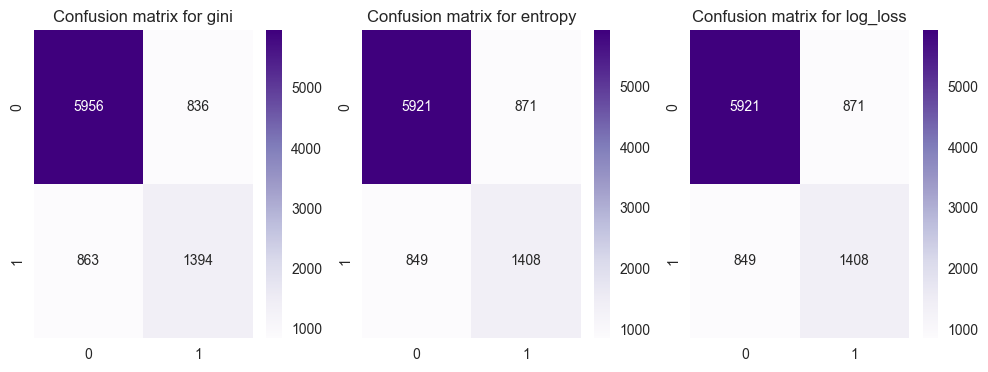

In [8]:
def evaluate_decision_tree(criterion):
    dtc = DecisionTreeClassifier(criterion=criterion, random_state=111)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, y_pred

criterions = ['gini', 'entropy', 'log_loss']
accuracy_dt_criterion = []

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, criterion in enumerate(criterions):
    accuracy, y_pred = evaluate_decision_tree(criterion)
    accuracy_dt_criterion.append((criterion, accuracy * 100))
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Purples", fmt='g', ax=ax[i])
    ax[i].set_title("Confusion matrix for " + criterion)
    
plt.show()

Dokładność klasyfikacji modelu DecisionTreeClassifier dla różnych kryteriów podziału

In [9]:
accuracy_dt_criterion = pd.DataFrame(accuracy_dt_criterion, columns = ["Criterion","Accuracy"])
accuracy_dt_criterion

,Criterion,Accuracy
0,gini,81.224445
1,entropy,80.992375
2,log_loss,80.992375


Przetestowanie modelu DecisionTreeClassifier dla kryterium gini i różnych maksymalnych głębokości

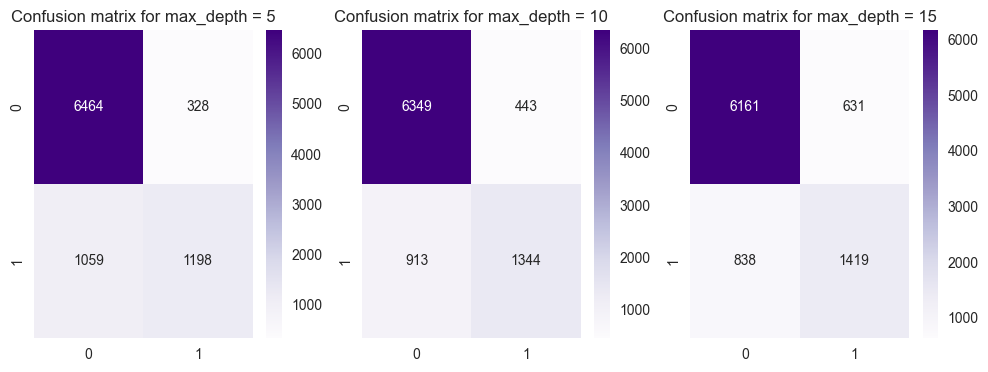

In [10]:
def evaluate_decision_tree(max_depth):
    dtc = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=111)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, y_pred

max_depths = [5, 10, 15]
accuracy_dt_max_depth = []

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, max_depth in enumerate(max_depths):
    accuracy, y_pred = evaluate_decision_tree(max_depth)
    accuracy_dt_max_depth.append(("Gini", max_depth, accuracy * 100))
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Purples", fmt='g', ax=ax[i])
    ax[i].set_title("Confusion matrix for max_depth = " + str(max_depth))
    
plt.show()

Dokładność klasyfikacji modelu DecisionTreeClassifier dla kryterium gini i różnych maksymalnych głębokości

In [11]:
accuracy_dt_max_depth = pd.DataFrame(accuracy_dt_max_depth, columns = ["Criterium","Max Depth","Accuracy"])
accuracy_dt_max_depth

,Criterium,Max Depth,Accuracy
0,Gini,5,84.672339
1,Gini,10,85.014919
2,Gini,15,83.766162


### K-Nearest Neighbors

Przetestowanie modelu K-Nearest Neighbors dla różnej liczby sąsiadów

In [12]:
accuracy_knn_cross_val = []
accuracy_knn_train = []

print("\nWalidacja krzyżowa")
for k in np.arange(3,31,2):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X, y, cv=5)
    accuracy = np.mean(scores)
    accuracy_knn_cross_val.append((k, accuracy))
    print(f"k = {k},  dokładność = {accuracy}")

print("\nZbiór uczący")
for k in np.arange(3,31,2):
    knn2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn2.fit(X_train, y_train)
    y_pred = knn2.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_knn_train.append((k, accuracy))
    print(f"k = {k},  dokładność = {accuracy}")


Walidacja krzyżowa
k = 3,  dokładność = 0.7560507449962431
k = 5,  dokładność = 0.7697434556447056
k = 7,  dokładność = 0.7735894171359028
k = 9,  dokładność = 0.7770044100946123
k = 11,  dokładność = 0.7813476641073566
k = 13,  dokładność = 0.7826074351895697
k = 15,  dokładność = 0.7833367737391297
k = 17,  dokładność = 0.7844639792810628
k = 19,  dokładność = 0.7843313148153765
k = 21,  dokładność = 0.7832041037775876
k = 23,  dokładność = 0.7819442337699681
k = 25,  dokładność = 0.7803860157286999
k = 27,  dokładność = 0.7784962052214148
k = 29,  dokładność = 0.776407422746952

Zbiór uczący
k = 3,  dokładność = 0.7538954580616642
k = 5,  dokładność = 0.7660514974030279
k = 7,  dokładność = 0.7684827052713007
k = 9,  dokładność = 0.7763288761189082
k = 11,  dokładność = 0.7796441595756437
k = 13,  dokładność = 0.7826279146867057
k = 15,  dokładność = 0.7810807824068958
k = 17,  dokładność = 0.7793126312299702
k = 19,  dokładność = 0.7804177257155487
k = 21,  dokładność = 0.77776549

Wizualizacja dokładności modelu K-Nearest Neighbors za pomocą wykresu separowalności

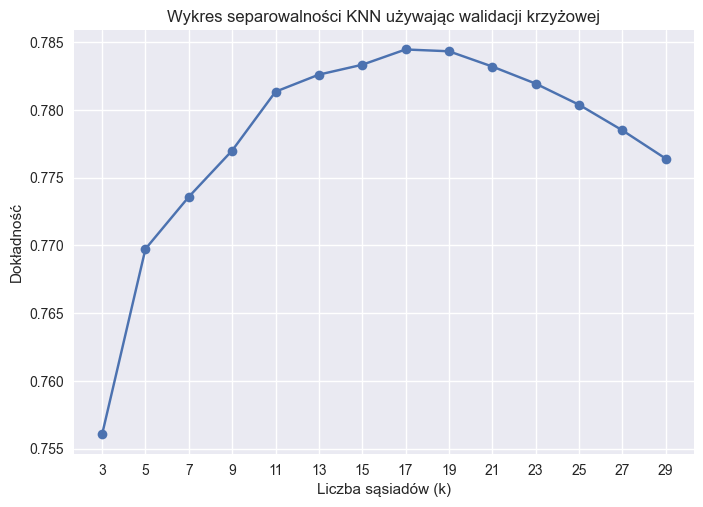

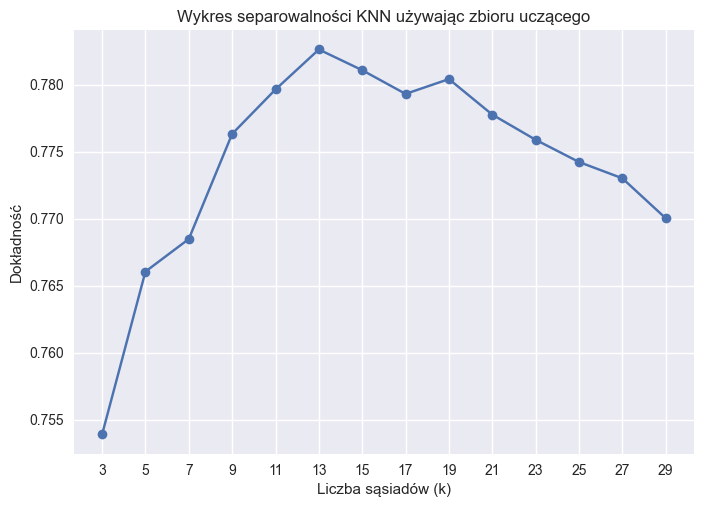

In [13]:
k_val, acc = zip(*accuracy_knn_cross_val)
k_val2, acc2 = zip(*accuracy_knn_train)


plt.figure('Wykres separowalności KNN')
plt.title('Wykres separowalności KNN używając walidacji krzyżowej')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Dokładność')
plt.plot(k_val, acc, marker='o')
plt.xticks(np.arange(3,31,2))
plt.show()

plt.figure('Wykres separowalności KNN')
plt.title('Wykres separowalności KNN używając zbioru uczącego')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Dokładność')
plt.plot(k_val2, acc2, marker='o')
plt.xticks(np.arange(3,31,2))
plt.show()

### RandomForestClassifier

Przetestowanie modelu RandomForestClassifier dla różnych kryteriów podziału

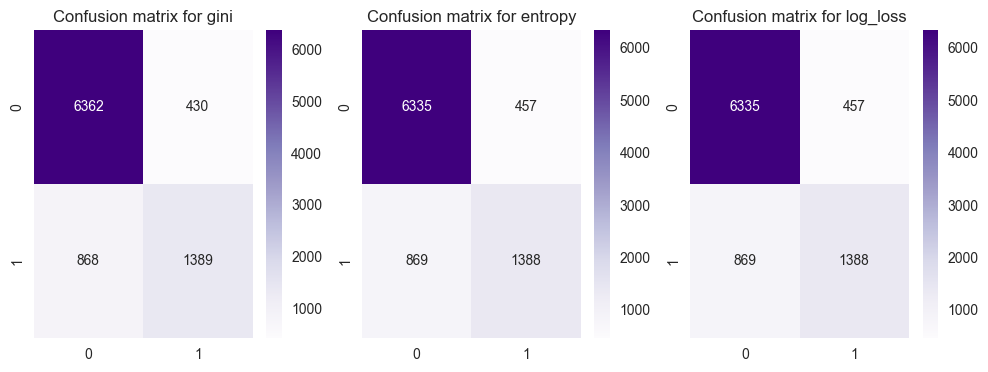

In [14]:
def evaluate_random_forest(criterion):
    rf = RandomForestClassifier(criterion=criterion, random_state=111)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, y_pred

criterions = ['gini', 'entropy', 'log_loss']
accuracy_rf_criterion = []

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, criterion in enumerate(criterions):
    accuracy, y_pred = evaluate_random_forest(criterion)
    accuracy_rf_criterion.append((criterion, accuracy * 100))
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Purples", fmt='g', ax=ax[i])
    ax[i].set_title("Confusion matrix for " + criterion)
    
plt.show()

Dokładność klasyfikacji modelu RandomForestClassifier dla różnych kryteriów podziału

In [15]:
accuracy_rf_criterion = pd.DataFrame(accuracy_rf_criterion, columns = ["Criterion","Accuracy"])
accuracy_rf_criterion

,Criterion,Accuracy
0,gini,85.655874
1,entropy,85.346447
2,log_loss,85.346447


Przetestowanie modelu RandomForestClassifier dla kryterium gini i różnych maksymalnych głębokości

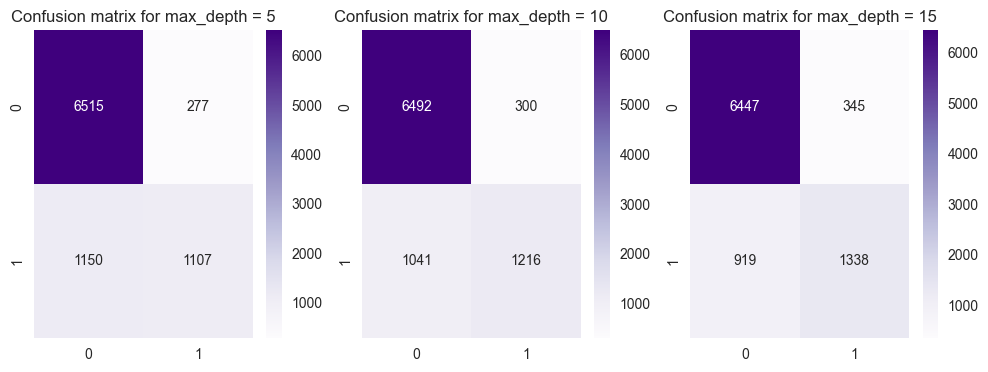

In [16]:
def evaluate_random_forest(max_depth):
    rf = RandomForestClassifier(criterion='gini', max_depth=max_depth, random_state=111)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, y_pred

max_depths = [5, 10, 15]
accuracy_rf_max_depth = []

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, max_depth in enumerate(max_depths):
    accuracy, y_pred = evaluate_random_forest(max_depth)
    accuracy_rf_max_depth.append(("Gini", max_depth, accuracy * 100))
    
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Purples", fmt='g', ax=ax[i])
    ax[i].set_title("Confusion matrix for max_depth = " + str(max_depth))
    
plt.show()

Dokładność klasyfikacji modelu RandomForestClassifier dla kryterium gini i różnych maksymalnych głębokości

In [17]:
accuracy_rf_max_depth = pd.DataFrame(accuracy_rf_max_depth, columns = ["Criterium","Max Depth","Accuracy"])
accuracy_rf_max_depth

,Criterium,Max Depth,Accuracy
0,Gini,5,84.230302
1,Gini,10,85.180683
2,Gini,15,86.031606


## Porównanie modeli klasyfikacji

Dokładność klasyfikacji dla domyślnych i dobranych parametrów każdego z klasyfikatorów

In [18]:
models = []

dtc = DecisionTreeClassifier(random_state=111)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc_default_acc = accuracy_score(y_test, y_pred)

dtc = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=111)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, y_pred)

models.append(('DecisionTreeClassifier', dtc_default_acc*100, dtc_acc*100))


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_default_acc = accuracy_score(y_test, y_pred)

knn = KNeighborsClassifier(n_neighbors=13, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)

models.append(('K-Nearest Neighbors', knn_default_acc*100, knn_acc*100))


knn = RandomForestClassifier(random_state=111)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rf_default_acc = accuracy_score(y_test, y_pred)

knn = RandomForestClassifier(criterion='gini', max_depth=15, random_state=111)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)

models.append(('RandomForestClassifier', rf_default_acc*100, rf_acc*100))


models = pd.DataFrame(models, columns = ["Model","Accuracy","Accuracy with parameters"])
models

,Model,Accuracy,Accuracy with parameters
0,DecisionTreeClassifier,81.224445,85.014919
1,K-Nearest Neighbors,76.605150,78.262791
2,RandomForestClassifier,85.655874,86.031606


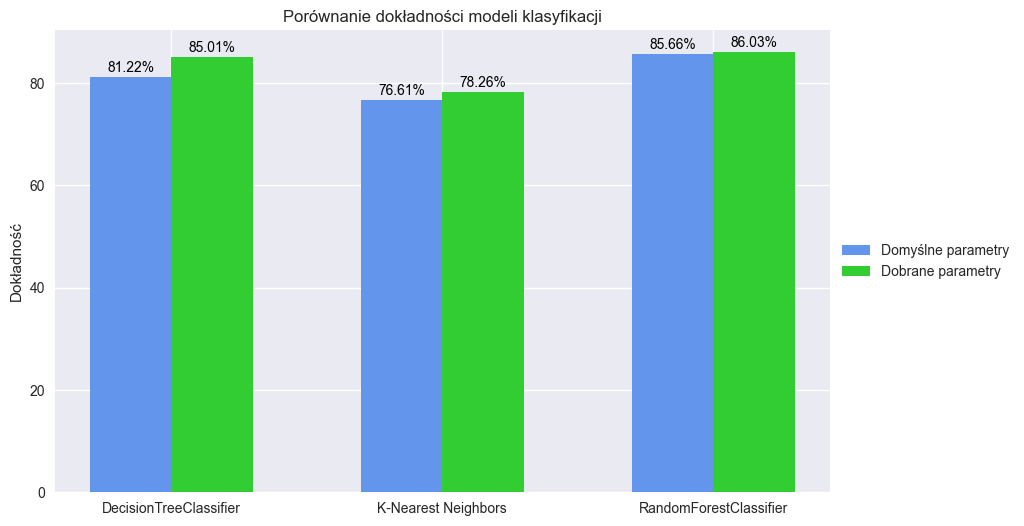

In [19]:
bar_width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))

bar_positions = np.arange(len(models))

ax.bar(bar_positions, models['Accuracy'], width=bar_width, label='Domyślne parametry', color='cornflowerblue')
ax.bar(bar_positions + bar_width, models['Accuracy with parameters'], width=bar_width, label='Dobrane parametry', color='limegreen')

ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(models['Model'])

ax.set_ylabel('Dokładność')
ax.set_title('Porównanie dokładności modeli klasyfikacji')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for i, acc in enumerate(models['Accuracy']):
    ax.text(i, acc + 1, f'{acc:.2f}%', ha='center', color='black')

for i, acc in enumerate(models['Accuracy with parameters']):
    ax.text(i + bar_width, acc + 1, f'{acc:.2f}%', ha='center', color='black')

plt.show()

## Wnioski

Model RandomForestClassifier osiągnął najwyższą dokładność (85.66%) spośród trzech badanych modeli. Po dostosowaniu parametrów, dokładność wzrosła nieznacznie do 86.03%. Oznacza to, że dodatkowe parametry miały bardzo niewielki, ale pozytywny wpływ na skuteczność tego modelu.

Model DecisionTreeClassifier uzyskał dobry wynik dokładności (81.22%). Jednak po uwzględnieniu odpowiednich parametrów, dokładność wzrosła do 85.01%, co jest znaczącą poprawą. To sugeruje, że w tym przypadku dobór odpowiednich parametrów był dobrą decyzją i przyczynił się do zauważalnie większej skuteczności modelu drzewa decyzyjnego.

Model K-Nearest Neighbors osiągnął najniższą dokładność (76.61%). Po dostosowaniu parametrów, dokładność wzrosła nieznacznie do 78.26%. Mimo to, model ten nadal ma niższą skuteczność w porównaniu do pozostałych dwóch modeli.

W przypadku wszystkich modeli parametry domyślne klasyfikatorów spowodowały gorszą dokładność niż po ich dobraniu.
Warto zatem eksperymentować z dobieraniem różnych parametrów, aby znaleźć optymalne konfiguracje dla każdego modelu.